# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable Trends

1.	Conditions such as percent humidity and cloudiness are lowest in the north and south poles; very few plots appeared in these regions. 
2.	Highest temperatures appear nearest the equator (0 latitude). This was assumption on my part, understanding that more sunlight hits the equator, until I see it plotted in this activity. 
3.	Temperatures in the northern hemisphere are much easier to predict (coefficient of determination; r-squared value) compared to the southern hemisphere. 
4.	Please note that each time this Jupyter notebook is run from the start, the list of cities (name and quantity) changes. This observation is not indicative of the weather trends identified by this activity. 


In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# OpenWeatherMap API Key
api_key = weather_api_key

In [5]:
# endpoint:  Url From openweather for API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"        

In [6]:
# create lists for append
city_name = []
country = []
date = []
temp = []
humidity = []
cloudiness = []
wind = []
lat = []
long = []

In [7]:
# begin loop through cities = API calls for each  
count = 1
for city in cities:
    city=city
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    
    response = requests.get(query_url).json()  
    
    # extract data from API
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        long.append(response["coord"]["lon"])
        wind.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"City record {count} : {city}")
        count += 1
    except (KeyError):
        print("City not found.")

City record 1 : lorengau
City record 2 : nanortalik
City record 3 : weinan
City record 4 : albany
City record 5 : norman wells
City record 6 : rikitea
City record 7 : egvekinot
City record 8 : lebu
City record 9 : qaanaaq
City record 10 : san juan
City record 11 : evensk
City record 12 : gat
City record 13 : pevek
City record 14 : clyde river
City not found.
City record 15 : ihosy
City record 16 : bluff
City not found.
City record 17 : chokurdakh
City record 18 : asau
City record 19 : puerto ayora
City record 20 : ushuaia
City record 21 : teguldet
City record 22 : whitianga
City record 23 : lavrentiya
City record 24 : pisco
City record 25 : busselton
City record 26 : east london
City record 27 : cape town
City record 28 : kapaa
City record 29 : vila franca do campo
City record 30 : ilulissat
City record 31 : bilma
City record 32 : vaini
City not found.
City record 33 : saint george
City record 34 : neuquen
City record 35 : mataura
City not found.
City record 36 : tiksi
City record 37 :

City not found.
City record 287 : umba
City record 288 : pulandian
City record 289 : kemise
City not found.
City record 290 : lasa
City record 291 : nuuk
City record 292 : nhulunbuy
City record 293 : bethel
City record 294 : dingle
City record 295 : katherine
City record 296 : zeya
City record 297 : namatanai
City record 298 : bubaque
City record 299 : touros
City not found.
City record 300 : maragogi
City record 301 : san ramon
City not found.
City record 302 : lagoa
City record 303 : emba
City not found.
City record 304 : kloulklubed
City record 305 : okha
City record 306 : lata
City record 307 : calatrava
City record 308 : nishihara
City record 309 : gramoteino
City record 310 : godo
City record 311 : fortuna
City record 312 : bima
City record 313 : conde
City record 314 : dixon
City record 315 : aksarka
City record 316 : ystad
City record 317 : castro
City record 318 : houma
City record 319 : makakilo city
City record 320 : oranjestad
City record 321 : kyra
City record 322 : dwarka

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {"City": city_name,
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": humidity,
                "Lat": lat,
                "Longitude": long,
                "Max Temp": temp,
                "Wind Speed": wind}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('Output_data/WeatherPy_data.csv')

In [9]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Longitude,Max Temp,Wind Speed
0,Lorengau,95,PG,1612537725,80,-2.0226,147.2712,80.22,5.97
1,Nanortalik,0,GL,1612537832,79,60.1432,-45.2371,23.07,1.28
2,Weinan,0,CN,1612537832,51,34.5036,109.5089,46.99,2.24
3,Albany,100,US,1612537788,63,42.6001,-73.9662,35.01,4.00
4,Norman Wells,75,CA,1612537833,62,65.2820,-126.8329,-25.60,14.97


In [10]:
# Export the City_Data into a csv
weather_data.to_csv("output_data/WeatherPy_data.csv")
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Longitude,Max Temp,Wind Speed
0,Lorengau,95,PG,1612537725,80,-2.0226,147.2712,80.22,5.97
1,Nanortalik,0,GL,1612537832,79,60.1432,-45.2371,23.07,1.28
2,Weinan,0,CN,1612537832,51,34.5036,109.5089,46.99,2.24
3,Albany,100,US,1612537788,63,42.6001,-73.9662,35.01,4.00
4,Norman Wells,75,CA,1612537833,62,65.2820,-126.8329,-25.60,14.97
...,...,...,...,...,...,...,...,...,...
560,Malaut,0,IN,1612537926,51,30.2167,74.4833,56.55,5.61
561,Lishan,0,CN,1612537926,68,31.8576,113.2951,48.09,2.15
562,Ewo,85,CG,1612537926,43,-0.8725,14.8206,91.71,3.65
563,Okmulgee,90,US,1612537926,74,35.6234,-95.9605,32.00,3.44


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.   #.loc
humidity_check = weather_data.loc[weather_data['Humidity']>100]
humidity_check

# There are no cities with humidity GREATER THAN 100%.

,City,Cloudiness,Country,Date,Humidity,Lat,Longitude,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

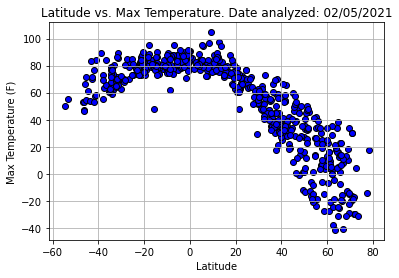

In [12]:
#Creating 1st plot ( Latitude vs Max temp)
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Latitude vs. Max Temperature. Date analyzed: {today}")
plt.savefig("Images/scatter_lat_temp")
plt.show()

About Lat vs Temp plot:  The closer to the equator, the warer the temperatures. 
As temps move away from 0 latitude on the x axis, the temperatures begin to drop.

## Latitude vs. Humidity Plot

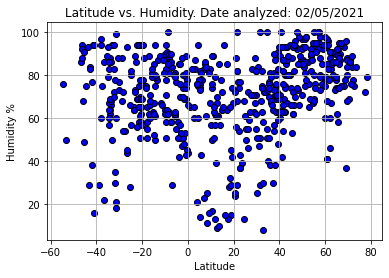

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker = "o", color = "blue",edgecolor = "black")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"Latitude vs. Humidity. Date analyzed: {today}")
plt.savefig("Images/scatter_lat_humidity")
plt.show()

About Lat vs. Humidity plot:  There is no real correlation between humidity and latitude. 

## Latitude vs. Cloudiness Plot

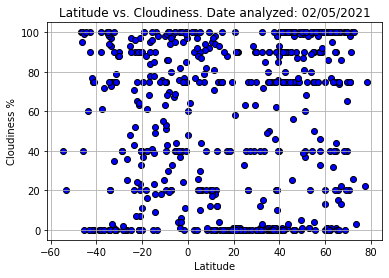

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"Latitude vs. Cloudiness. Date analyzed: {today}")
plt.savefig("Images/scatter_lat_cloudiness")
plt.show()

About Lat vs Cloudiness plot: There is evidence of cloudiness clustering horizonally along the latitude lines. More weather analysis should be done to explain why. 

## Latitude vs. Wind Speed Plot

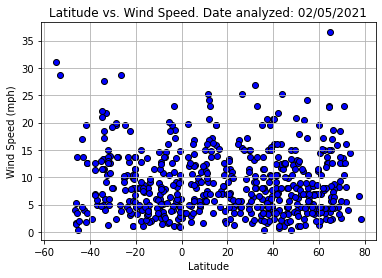

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs. Wind Speed. Date analyzed: {today}")
plt.savefig("Images/scatter_lat_wind")
plt.show()

About Lat vs Wind plot:  There is a strong correlation between wind speed near the equator. It is highest at this point, demonstrated by the clusters of blue dots. Wind speeds slow down further north.

## Linear Regression

In [16]:
# Run linear regression on each relationship. Separate plots into Northern Hemisphere (greater >= to 0 degrees latitude)
# Southern Hemisphere (< 0 degrees latitude)

northern = weather_data.loc[weather_data['Lat']>=0]
southern = weather_data.loc[weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7840252437224166


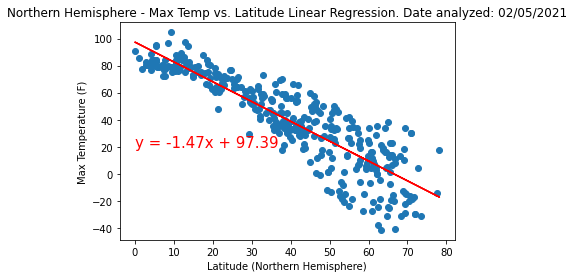

In [17]:
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression. Date analyzed: {today}")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/north_linear_temp_lat")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.41793702771019575


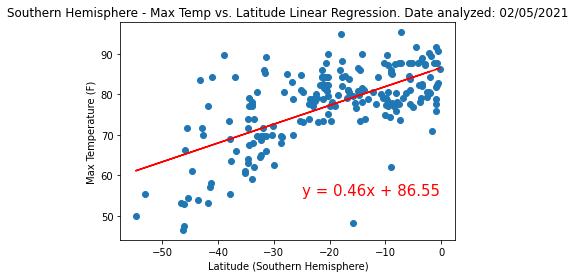

In [18]:
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,55),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression. Date analyzed: {today}")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/south_linear_temp_lat")
plt.show()

Analysis of Max Temp vs Latitude linear regression:  The r squared number for the northern hemisphere is higher than 
the southern hemishpere, and therefore more acurate. More data points fall closer to the regression line in the 
northern hemisphere, indicating that the temperatures in the northern hemisphere are more predictable than in the 
southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18549574614090747


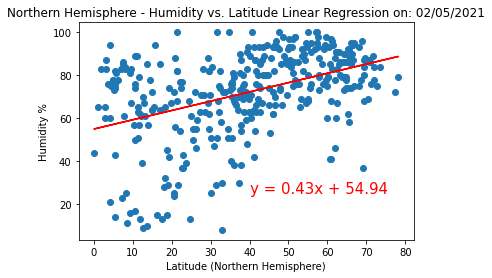

In [19]:
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Humidity vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("scatter_lat_humidity")
plt.savefig("Images/north_linear_humid_lat")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00036982260081948364


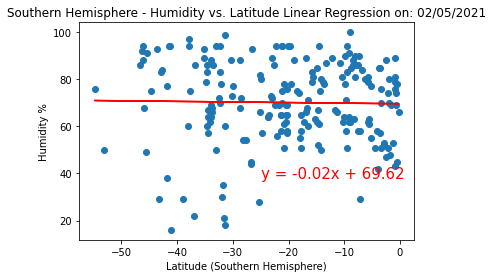

In [20]:
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,38),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Humidity vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/south_linear_humid_lat")
plt.show()

Analysis of Humidity vs Latitude linear regression: Humidity is unpredictable in both hemispheres; 
both have approximately 20% predictablity given their low r-square numbers. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05072010630656385


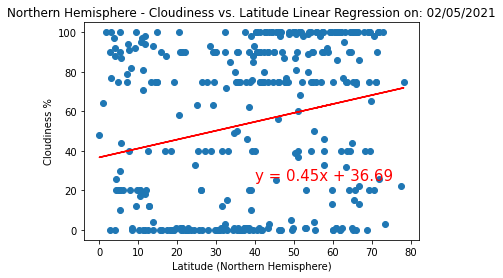

In [21]:
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/north_linear_cloud_lat")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007357198962457037


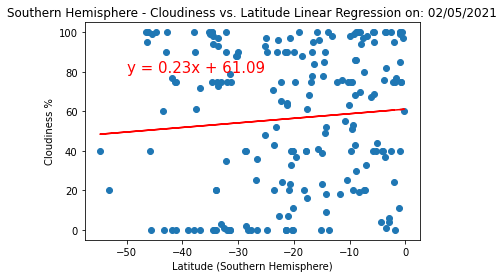

In [22]:
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/south_linear_cloud_lat")
plt.show()

Analysis of Cloudiness vs Latitude linear regression: Similar to the humidity predictors in both northern and 
southern hemispheres, cloudiness is even less predictable given the low r-squared numbers and scattered dots 
not aligning with regression line.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0009547035814876499


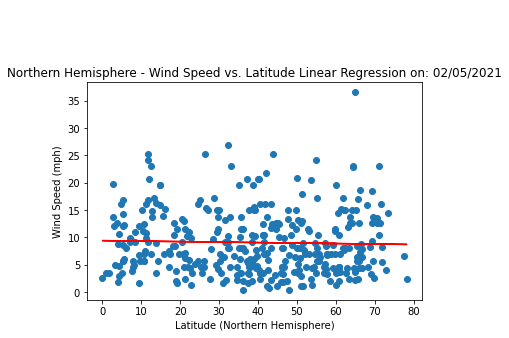

In [23]:
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/north_linear_wind_lat")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04326674422286377


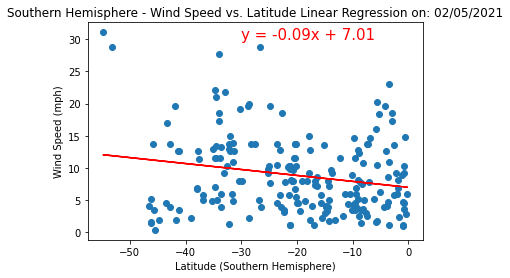

In [24]:
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/south_linear_wind_lat")
plt.show()

Analysis of Wind Speed vs Latitude linear regression: Although the r-squared numbers for the wind speed in both 
northern and southern hemispheres is very low, the plotted speeds fall somewhat along the regression line. 
Low r-squared values are not always bad. In both hemispheres, latitude is the constant variable that 
indicates wind speeds are lower, nearest to the equator, for both hemispheres. 